In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 

import re
import os

## Testing on Random Forest Model

New Imports not in the existing Demonstrations Notebook:

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.kernel_ridge import KernelRidge


import warnings; warnings.filterwarnings('ignore')

In [3]:
cuprate_X = pd.read_csv('./data/superconductors/cuprate.csv')

# RF

In [4]:
noFS_RFmodel = RandomForestRegressor()
train_data, test_data = train_test_split(cuprate_X, train_size =  50)

In [5]:
train_Tc = train_data['critical_temp'].copy()
train_data.drop('critical_temp', axis = 1, inplace = True)

test_Tc = test_data['critical_temp'].copy()
test_data.drop('critical_temp', axis = 1, inplace = True)


noFS_RFmodel.fit(train_data, train_Tc)

noFS_RFmodel_predictions = noFS_RFmodel.predict(test_data)

mean_absolute_error(y_true = test_Tc, y_pred = noFS_RFmodel_predictions)

21.331750352986067

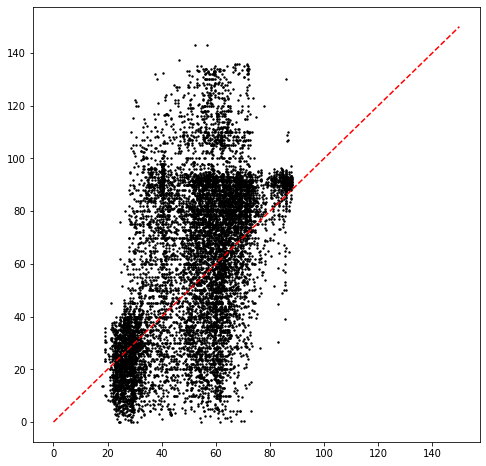

In [6]:
plt.figure(figsize = (8,8))
plt.scatter(noFS_RFmodel_predictions, test_Tc, s = 2, color = 'black')

xtest = np.linspace(0, 150,100)
plt.plot(xtest, xtest, color = 'red', ls= '--')


# KNN with RFE

In [7]:
random_forest_for_RFE = RandomForestRegressor()
knn_with_rfe = Pipeline([
#     ('rfe',  RFE(estimator= random_forest_for_RFE, n_features_to_select= 80)), 
    ('knn', KNeighborsRegressor(n_neighbors= 5, metric='jaccard', n_jobs= 2))  
])

In [8]:
knn_with_rfe.fit(train_data, train_Tc)
knn_with_rfe_model_predictions = knn_with_rfe.predict(test_data)
mean_absolute_error(y_true = test_Tc, y_pred = knn_with_rfe_model_predictions)

30.991520797557722

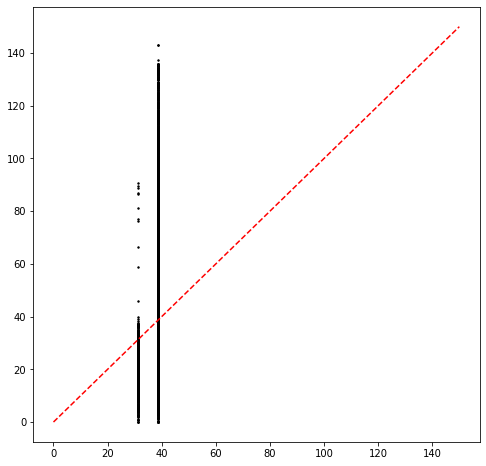

In [9]:
plt.figure(figsize = (8,8))
plt.scatter(knn_with_rfe_model_predictions, test_Tc, s = 2, color = 'black')

xtest = np.linspace(0, 150,100)
plt.plot(xtest, xtest, color = 'red', ls= '--')


# Simple KRR

In [10]:
krr_model = Pipeline([
    ('scale', StandardScaler()),
    ('krr', KernelRidge(kernel='rbf'))
])

In [11]:
gs = GridSearchCV(krr_model,
    {'krr__gamma': np.logspace(-8, 0, 16), 'krr__alpha': np.logspace(-8, 0, 16)}, # two hyper-parameters
    cv=10,
    scoring='neg_mean_squared_error'  
)

In [12]:
gs.fit(train_data, train_Tc)
krr_model_pred = gs.best_estimator_.predict(test_data)
mean_absolute_error(y_true = test_Tc, y_pred = krr_model_pred)

26.210653457965385

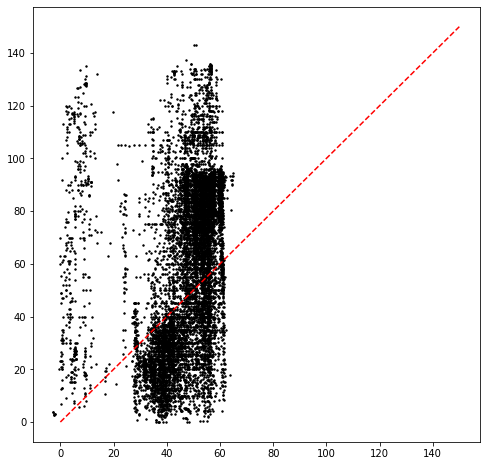

In [13]:
plt.figure(figsize = (8,8))
plt.scatter(krr_model_pred, test_Tc, s = 2, color = 'black')

xtest = np.linspace(0, 150,100)
plt.plot(xtest, xtest, color = 'red', ls= '--')
